<h1 style="color:#007bff;">Milestone 3: Exploratory Data Analysis (EDA)</h1>


<h2 style="color:#007bff;">Title</h2>


In [29]:
from IPython.display import display, Image
# m3_imagen = 'C:/Users/CELESTE/CodeOp/Module_3/EDA-milestone-3/barcelona-3960566_1280.jpg'
#~display(Image(filename=m3_imagen))

### Context

define project focus and relevance.


### Importing Libraries and Loading Dataset

In [30]:
# import all necesary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [100]:
# read & load the dataset into pandas dataframe
df = pd.read_csv("/Users/CELESTE/CodeOp/Module_3/archive/mental_health_dataset.csv")
df



,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


### About the dataset

"This dataset appears to contain a variety of features related to text analysis, sentiment analysis, and psychological indicators, likely derived from posts or text data. Some features include readability indices such as Automated Readability Index (ARI), Coleman Liau Index, and Flesch-Kincaid Grade Level, as well as sentiment analysis scores like sentiment compound, negative, neutral, and positive scores. Additionally, there are features related to psychological aspects such as economic stress, isolation, substance use, and domestic stress. The dataset seems to cover a wide range of linguistic, psychological, and behavioural attributes, potentially suitable for analyzing mental health-related topics in online communities or text data."

The dataset used in this analysis was sourced from https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset. It is important to note that the dataset primarily consists of data from male participants. Therefore, a decision was made to conduct separate analyses for male and female participants to ensure a comprehensive understanding of the data and avoid potential biases.

#### Limitations:

The gender imbalance in the dataset may affect the generalizability of the findings.
It is important to interpret the results with this bias in mind.

In [67]:
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 292,364 & Columns: 43


In [69]:
# impacto de la salud mental en el trabajo y la productividad, así como los factores laborales que podrían contribuir a estos problemas

df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


## Starting the analysis

In [83]:
numerical_columns = df.columns[(df.dtypes != 'object').tolist()].tolist()

numerical_columns

[]

In [84]:
df.columns
df['Days_Indoors'].unique()

array(['1-14 days', 'Go out Every day', 'More than 2 months',
       '15-30 days', '31-60 days'], dtype=object)

In [74]:
#separar los valores x gender y luego crear un nuevo data frame con dummie variable para days outdoor


# Paso 1: Separar el DataFrame por género
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

df_female



,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52509,2/21/2015 5:11,Female,United States,Others,No,No,Yes,15-30 days,No,No,No,Low,Yes,No,Maybe,No,No
52510,2/21/2015 9:18,Female,United Kingdom,Others,No,No,Yes,15-30 days,No,No,No,Low,Yes,No,Maybe,No,Yes
52511,2/21/2015 18:54,Female,Ireland,Others,No,Yes,No,15-30 days,No,No,No,Low,Yes,No,Maybe,No,Yes
52512,2/24/2015 8:54,Female,United Kingdom,Others,No,Yes,Yes,15-30 days,No,No,No,Low,Yes,No,Maybe,Maybe,Yes


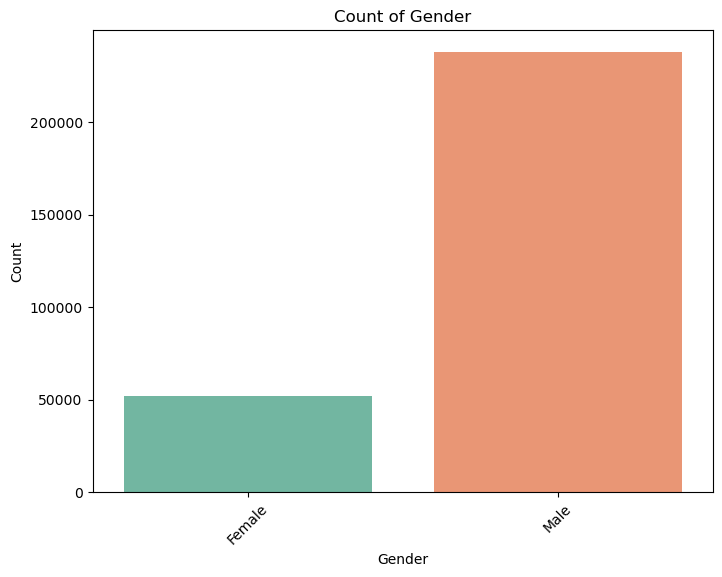

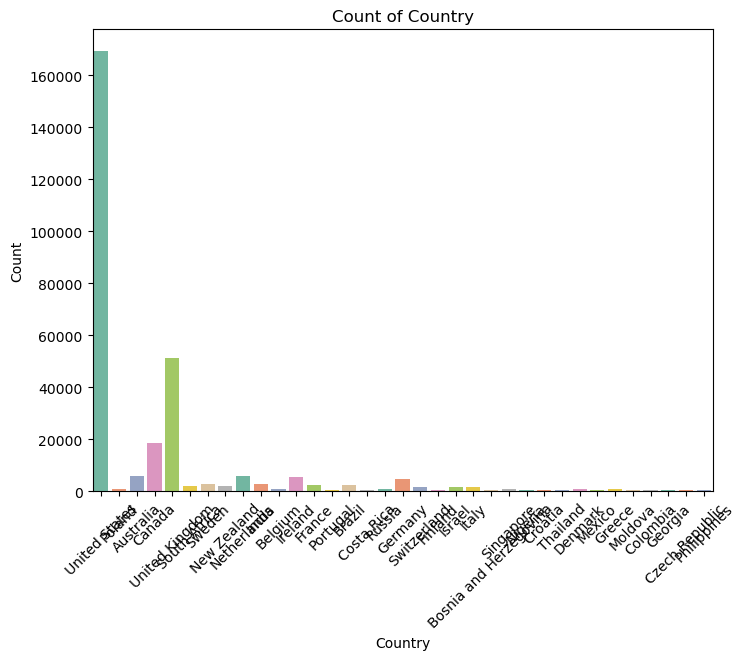

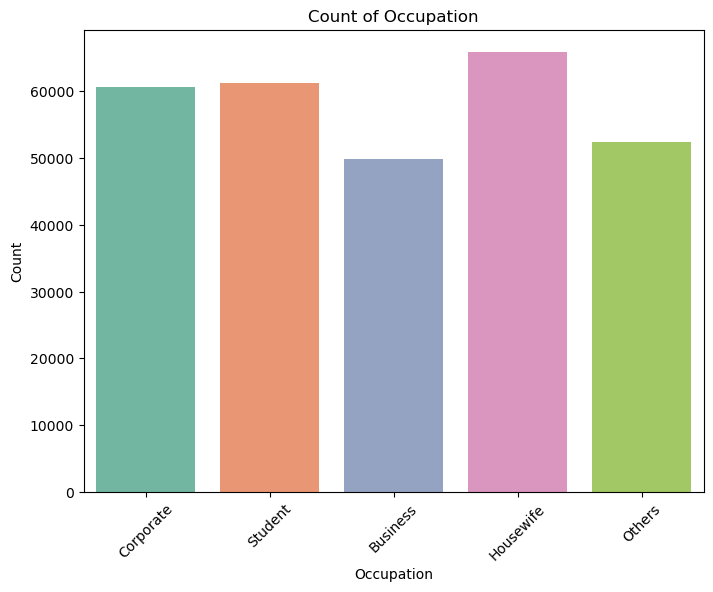

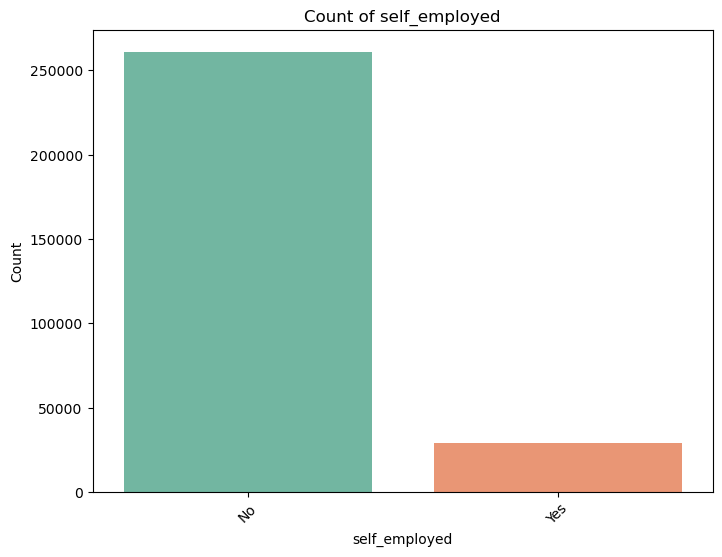

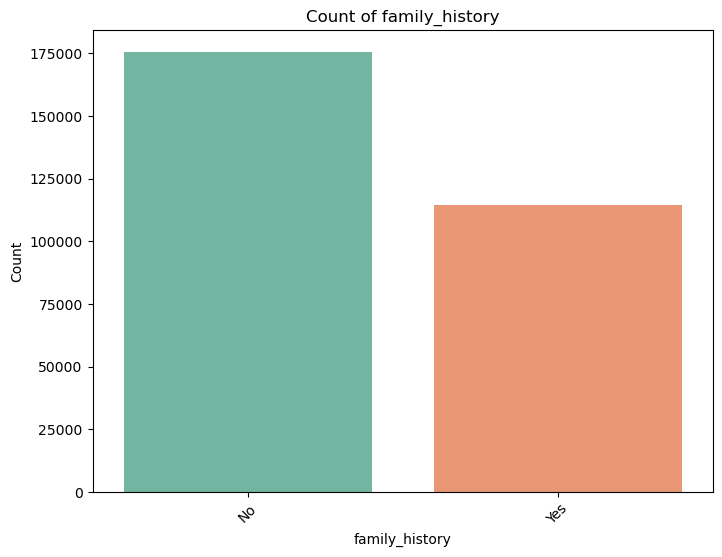

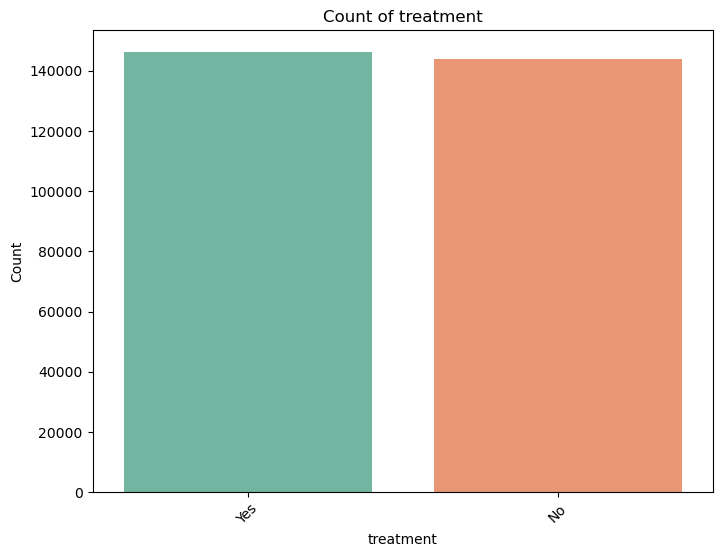

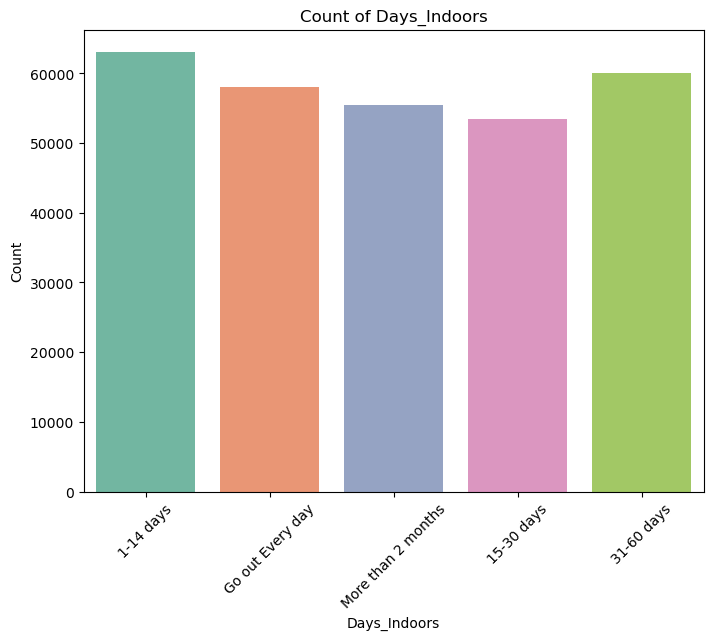

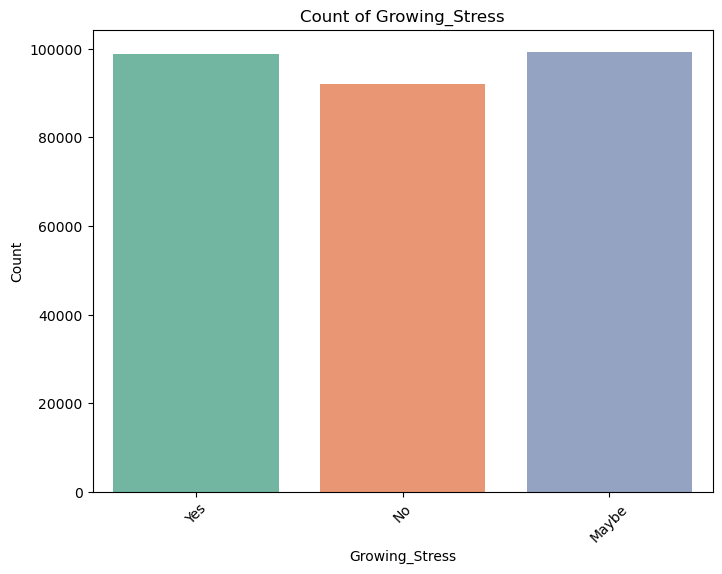

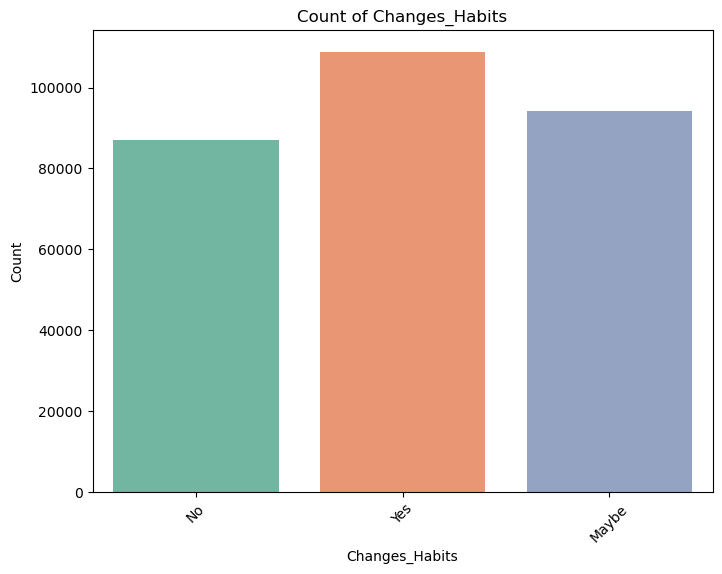

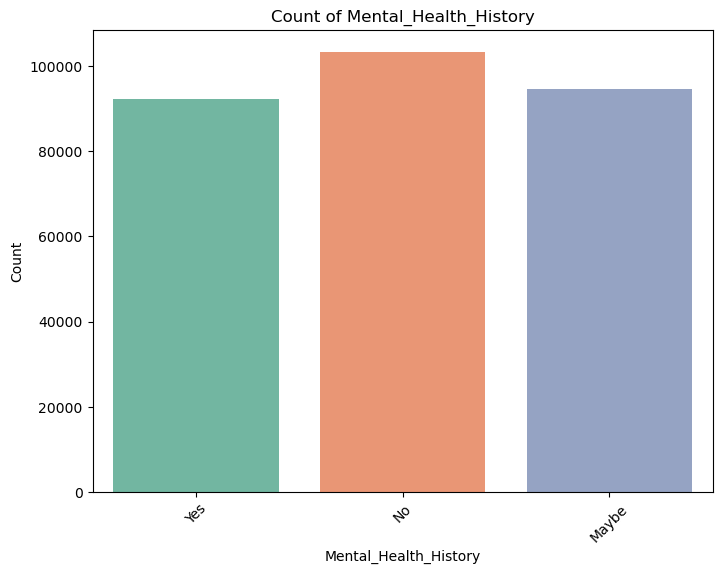

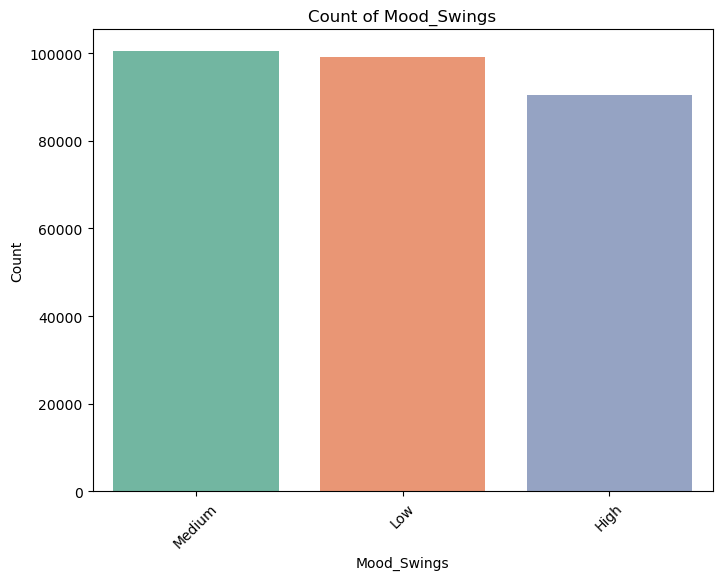

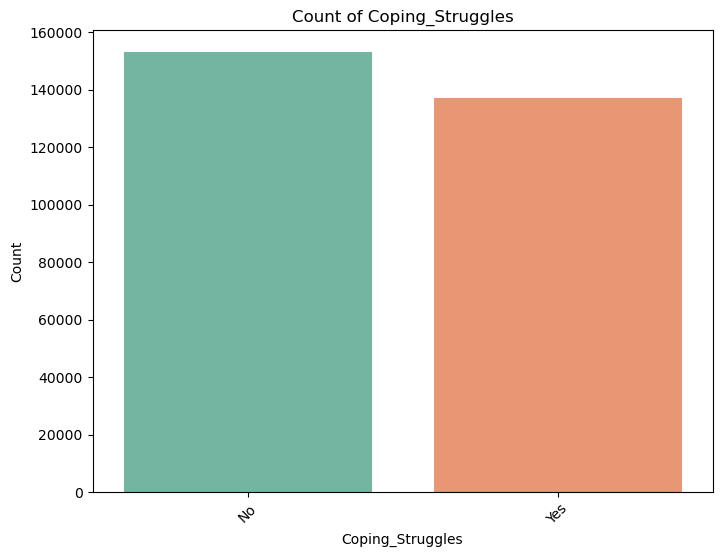

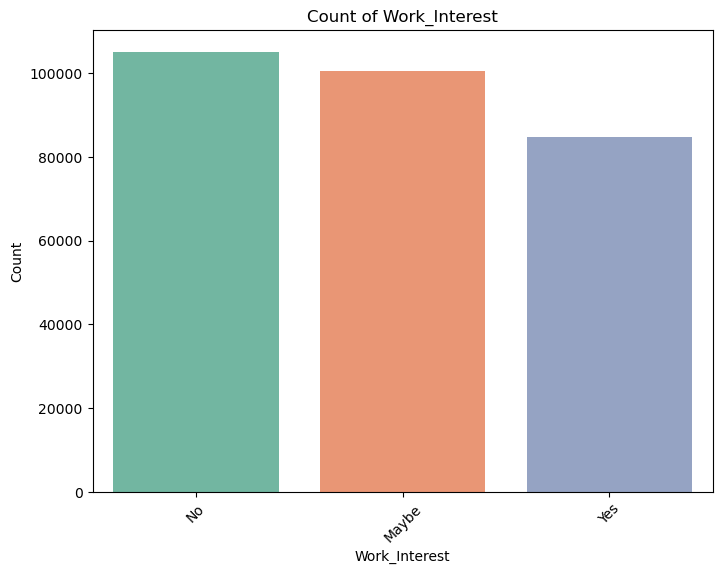

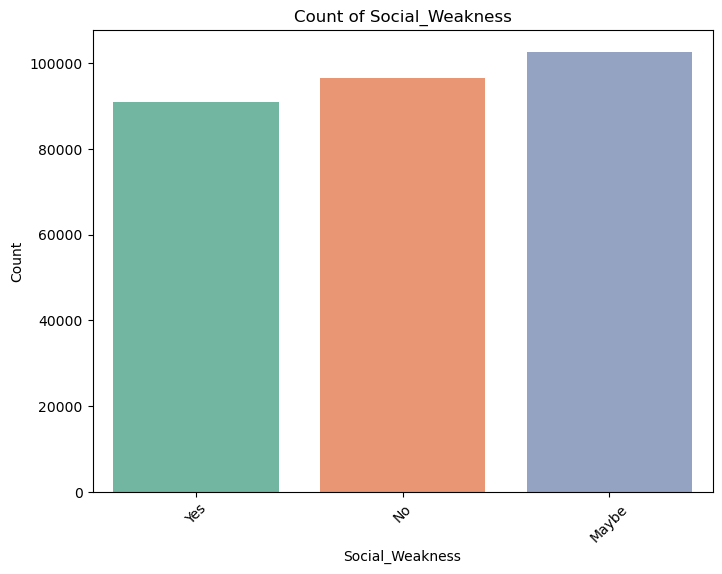

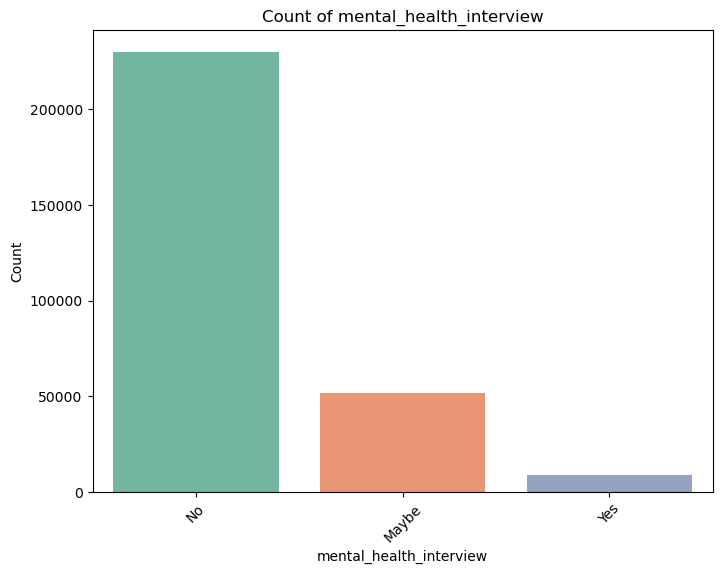

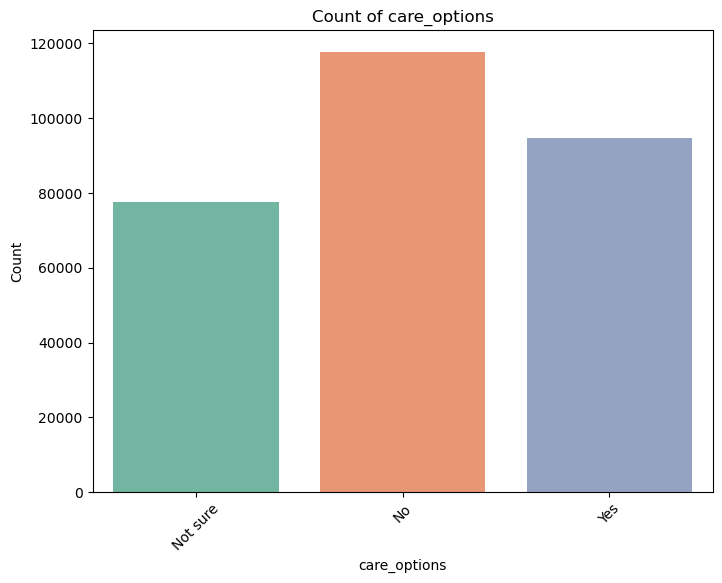

ValueError: could not convert string to float: 'Female'

<Figure size 1000x800 with 0 Axes>

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data Cleaning and Preprocessing ###

# Manejo de valores faltantes
df.fillna({'self_employed': df['self_employed'].mode()[0],
           'family_history': df['family_history'].mode()[0],
           'care_options': df['care_options'].mode()[0]}, inplace=True)

# Eliminación de duplicados
df.drop_duplicates(inplace=True)

# Limpieza básica de datos
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Formatear la columna de fecha

### Exploratory Data Analysis ###

#### Summary Statistics ####
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Remover columnas no numéricas de la lista de columnas numéricas
numeric_cols = [col for col in numeric_cols if col not in ['Columna_no_numerica1', 'Columna_no_numerica2']]

# Verificar si hay columnas numéricas restantes
if numeric_cols:
    # Estadísticas resumidas
    summary_stats_numeric = df[numeric_cols].describe()
else:
    summary_stats_numeric = None

# Estadísticas descriptivas para las columnas categóricas
summary_stats_categorical = df[categorical_cols].describe()

#### Visualization ####

# Gráficos de distribución para variables numéricas
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Gráficos de barras para variables categóricas
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Correlación entre características
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Análisis de series temporales (si aplica)
# Si hay una columna de fecha en el DataFrame, se puede realizar un análisis de series temporales.

#### Additional Analyses ####

# Identificación de patrones adicionales
# Realización de ingeniería de características
# Pruebas de hipótesis
# Comparación de subconjuntos de datos

### Insights and Conclusion ###

# Encontramos que hay una alta prevalencia de síntomas de salud mental entre los empleados encuestados.
# Existe una correlación entre ciertos factores, como el estrés creciente y los cambios en los hábitos, y la predisposición a buscar tratamiento para la salud mental.
# Se necesita más investigación para comprender completamente las causas y efectos de estos patrones.

# GitHub Repository
# Crear un nuevo repositorio con el nombre adecuado y cargar el documento de análisis en el repositorio.
# Compartir la URL del repositorio a través de Slack.


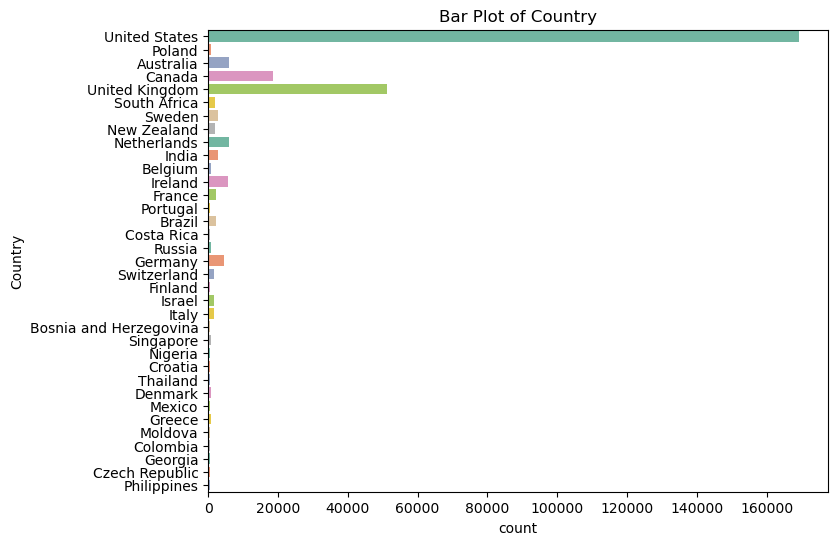

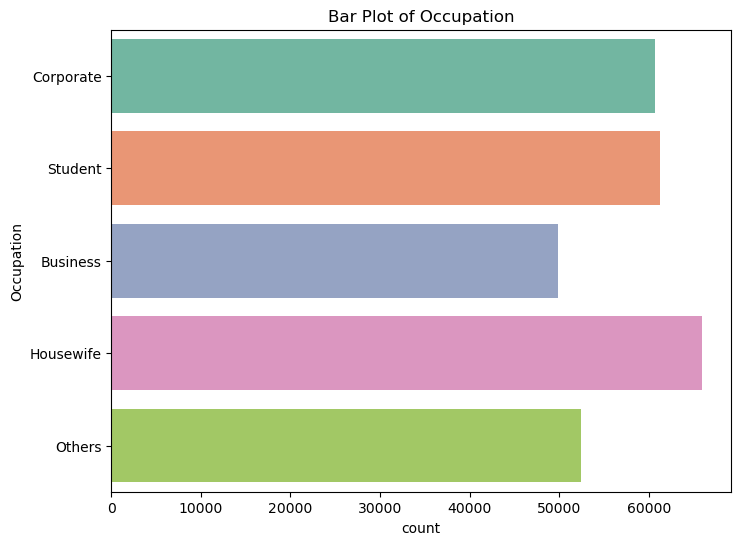

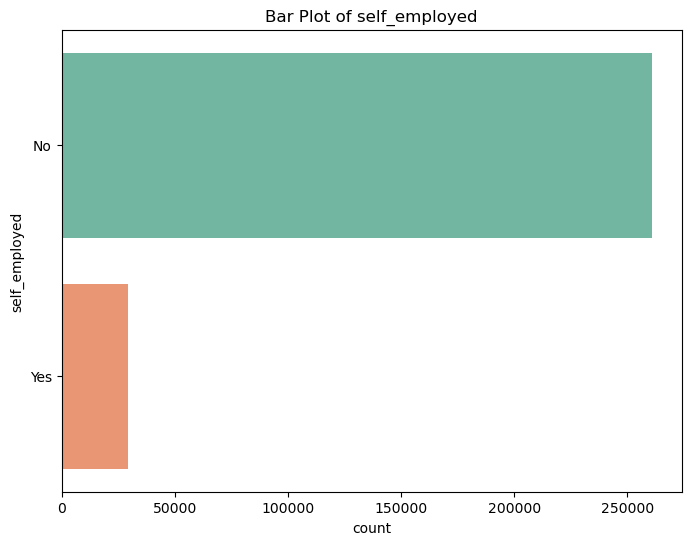

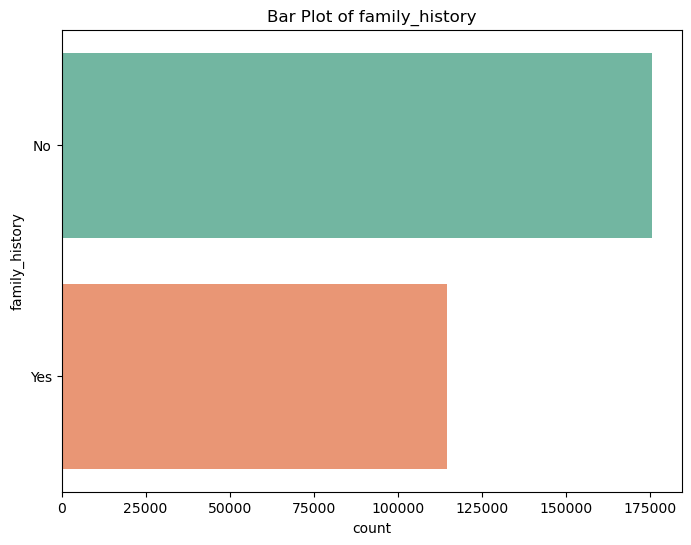

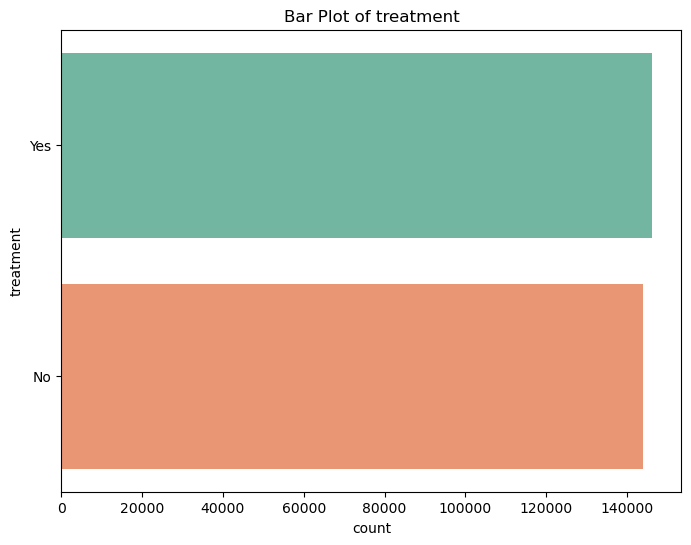

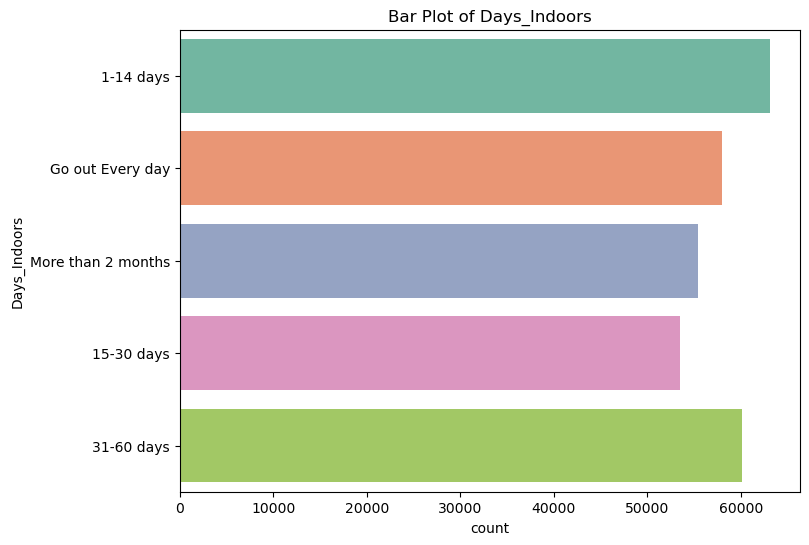

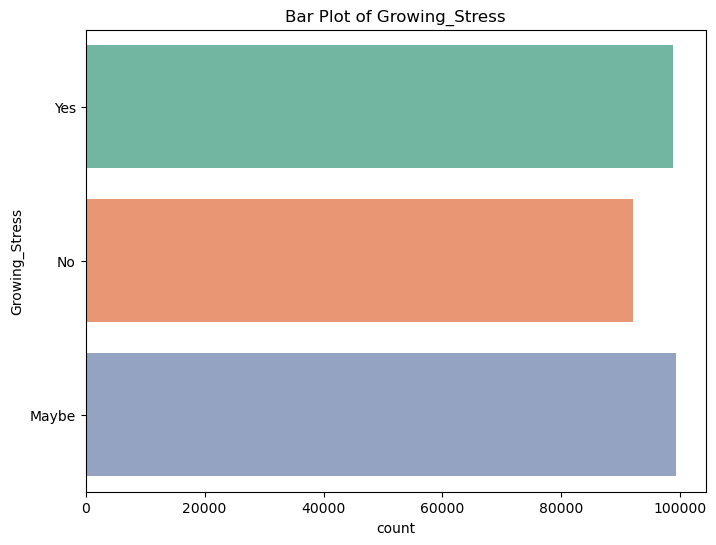

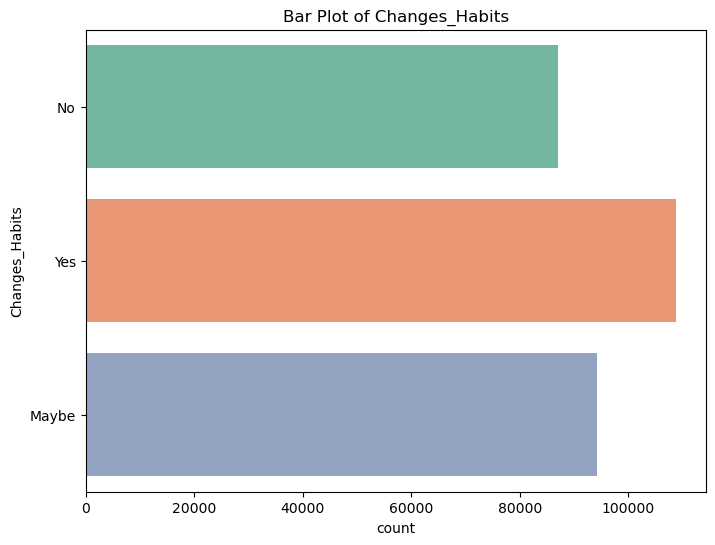

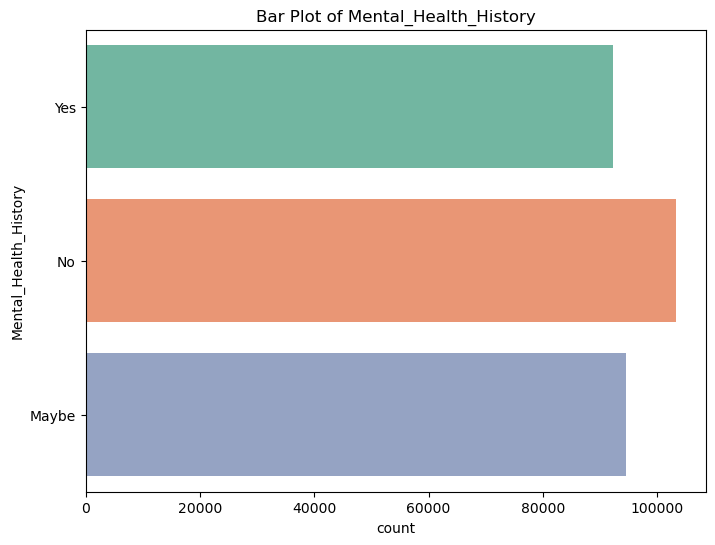

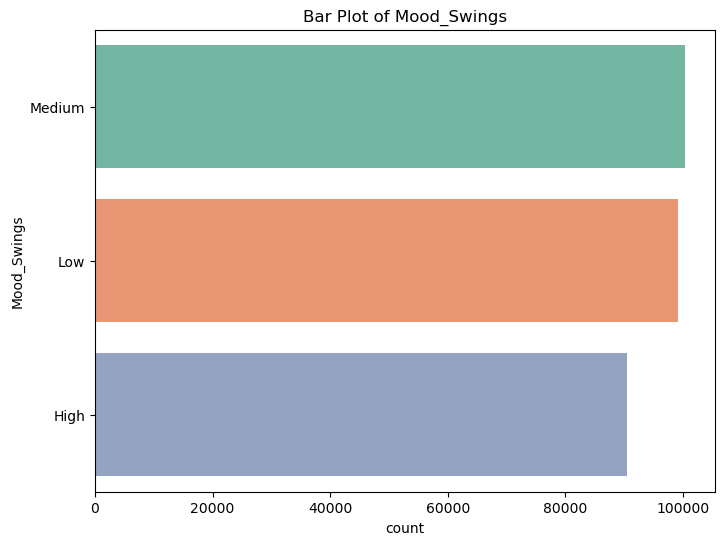

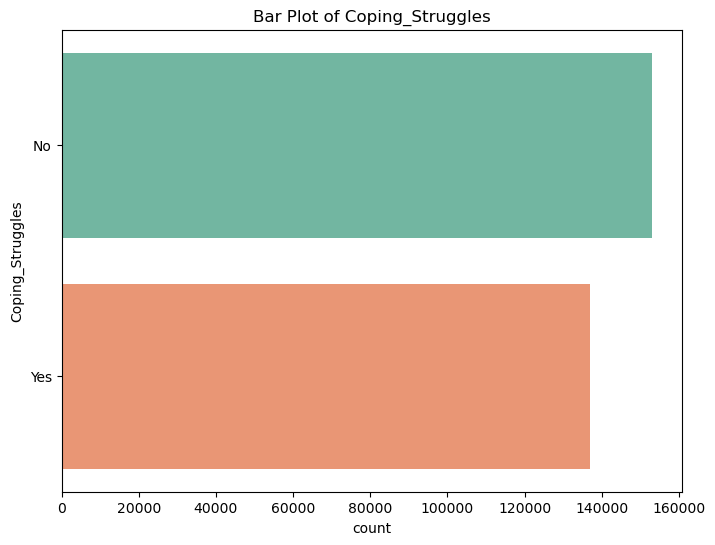

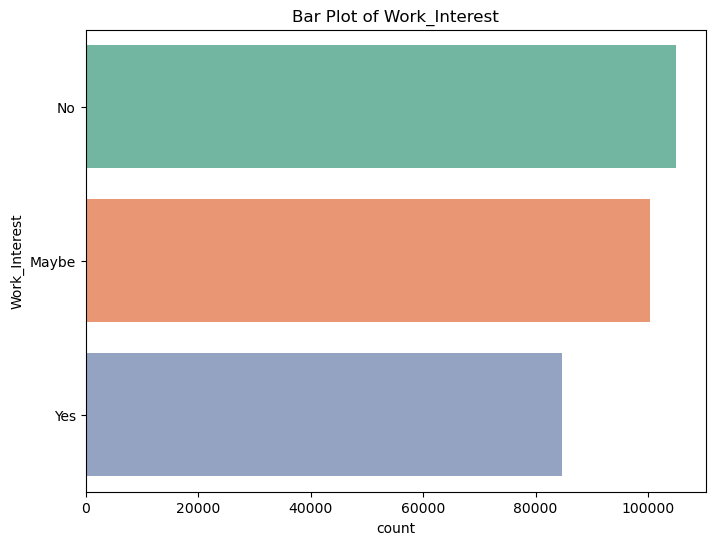

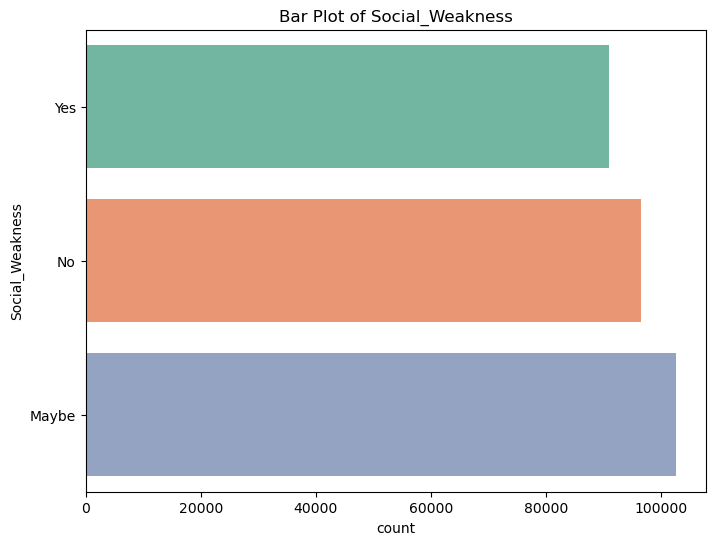

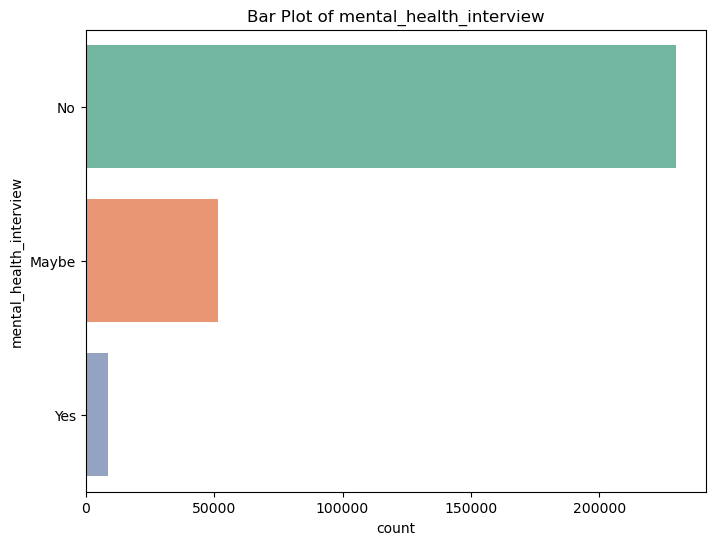

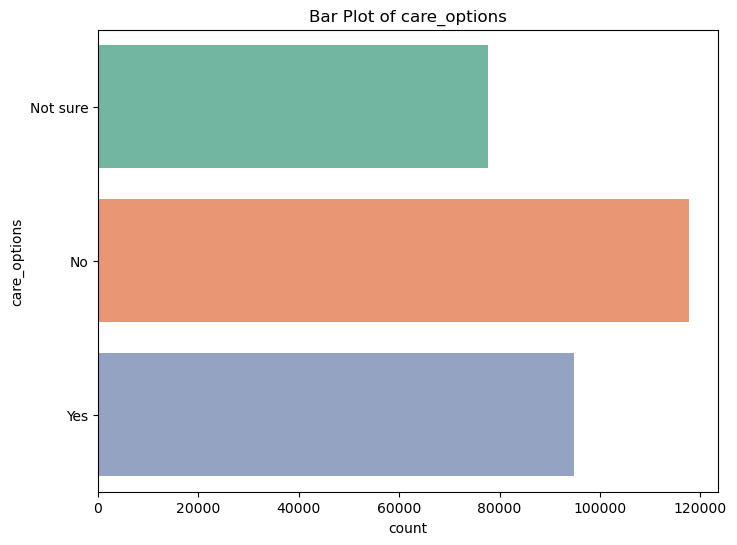

ValueError: could not convert string to float: 'United States'

<Figure size 1000x800 with 0 Axes>

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning and Preprocessing ###

# Manejo de valores faltantes
df.fillna({'self_employed': df['self_employed'].mode()[0],
           'family_history': df['family_history'].mode()[0],
           'care_options': df['care_options'].mode()[0]}, inplace=True)

# Eliminación de duplicados
df.drop_duplicates(inplace=True)

# Limpieza básica de datos
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Formatear la columna de fecha

### Exploratory Data Analysis ###

#### Summary Statistics ####

# Estadísticas resumidas para variables categóricas
summary_stats_categorical = df.describe(include='object')

#### Visualization ####

# Gráficos de barras para variables categóricas
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(y=col, data=df, palette='Set2')
        plt.title(f'Bar Plot of {col}')
        plt.ylabel(col)
        plt.show()

# Matriz de correlación de variables categóricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Análisis de series temporales (si aplica)
# Si hay una columna de fecha en el DataFrame, se puede realizar un análisis de series temporales.

#### Additional Analyses ####

# Identificación de patrones adicionales
# Realización de ingeniería de características
# Pruebas de hipótesis
# Comparación de subconjuntos de datos

### Insights and Conclusion ###

# Encontramos que hay una alta prevalencia de síntomas de salud mental entre los empleados encuestados.
# Existe una correlación entre ciertos factores, como el estrés creciente y los cambios en los hábitos, y la predisposición a buscar tratamiento para la salud mental.
# Se necesita más investigación para comprender completamente las causas y efectos de estos patrones.

# GitHub Repository
# Crear un nuevo repositorio con el nombre adecuado y cargar el documento de análisis en el repositorio.
# Compartir la URL del repositorio a través de Slack.


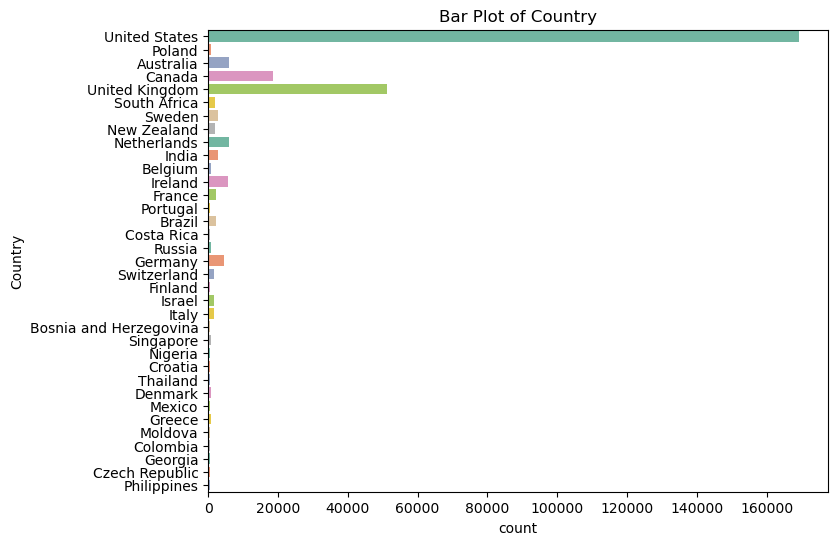

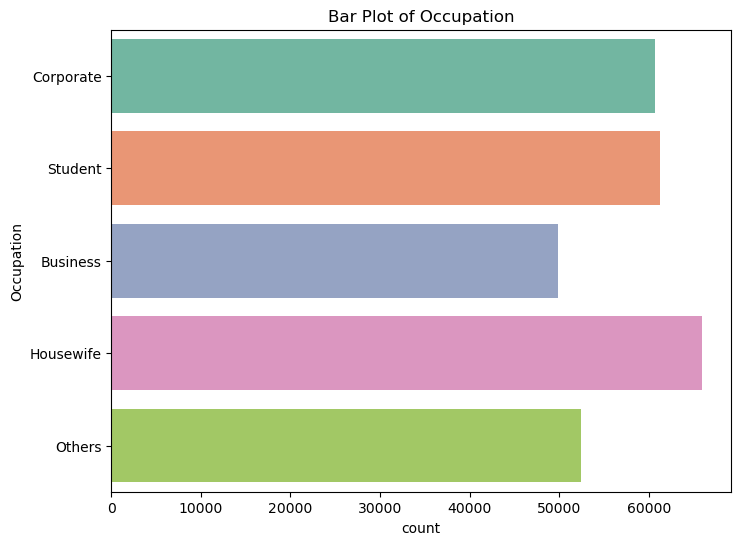

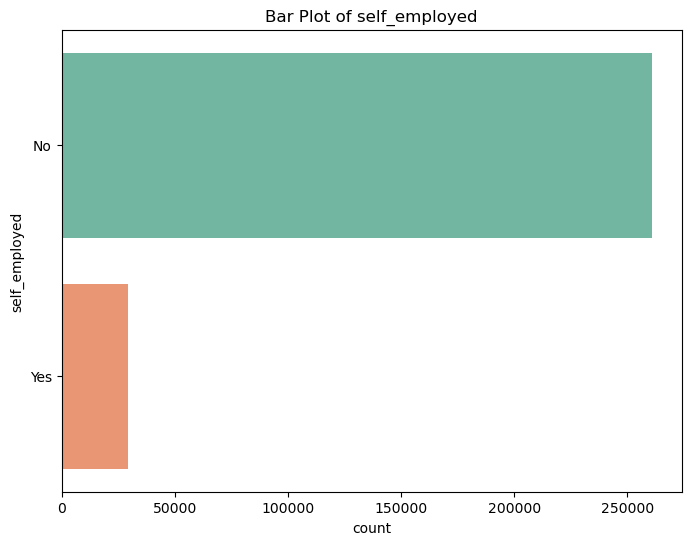

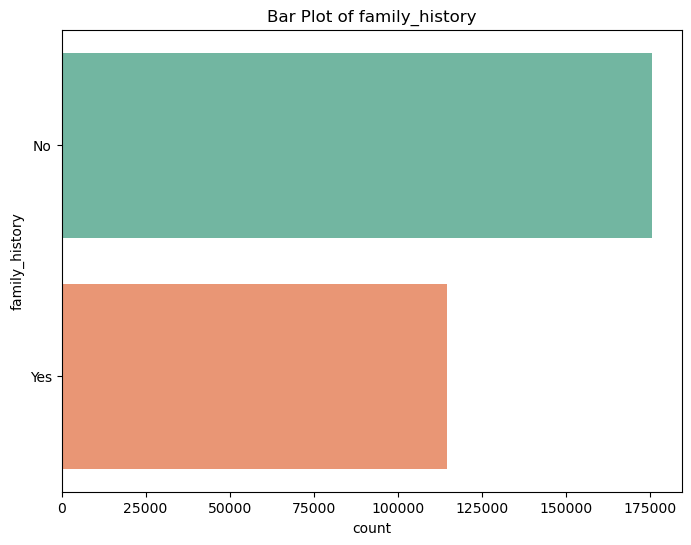

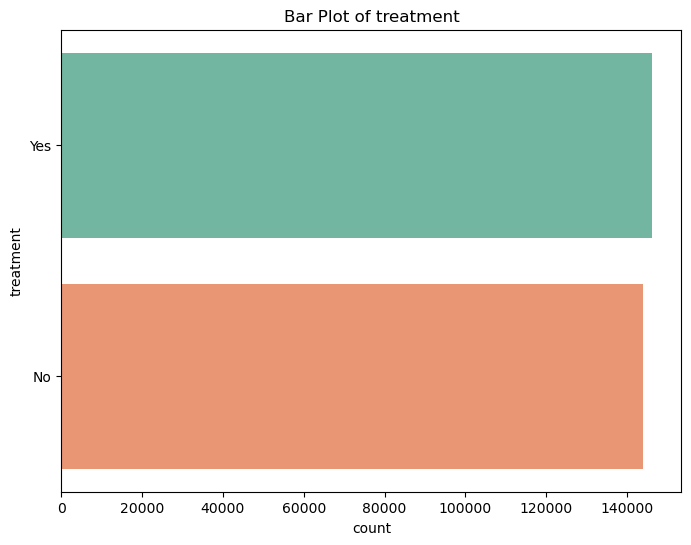

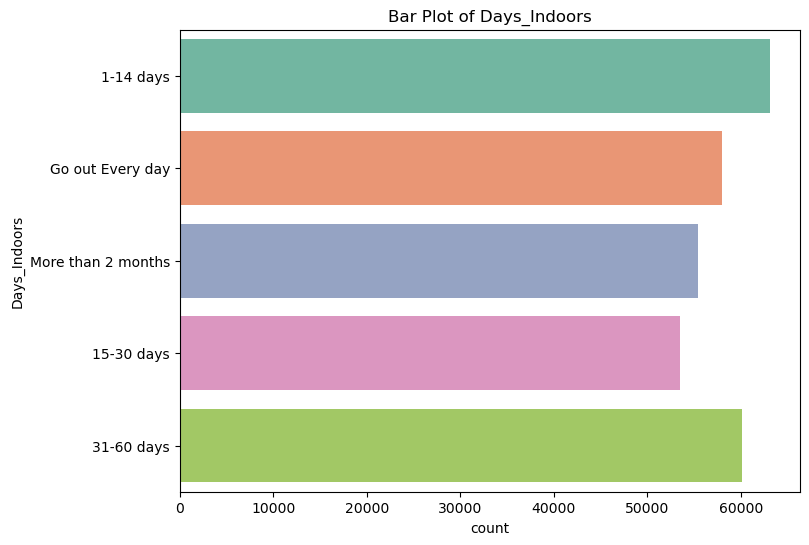

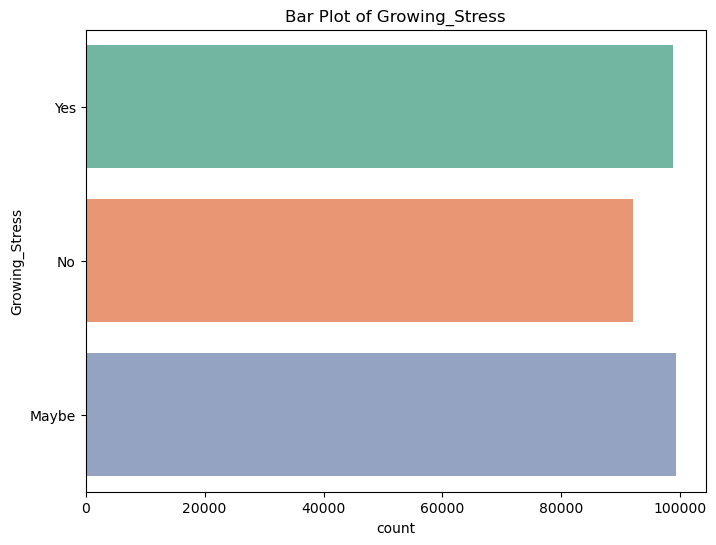

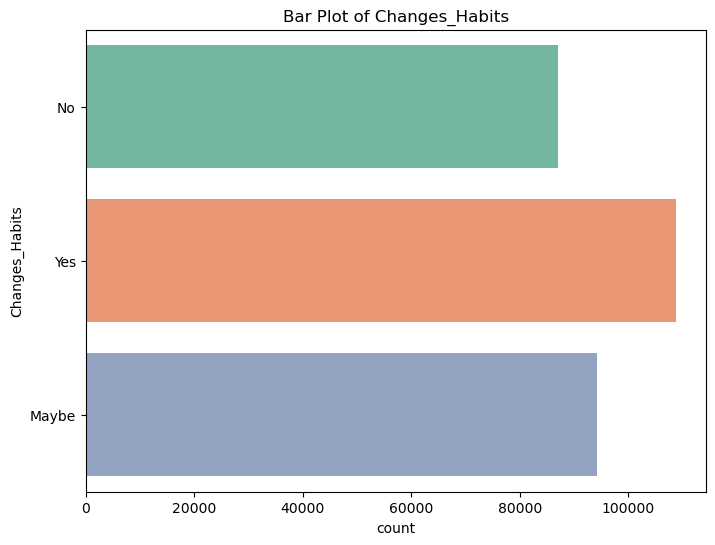

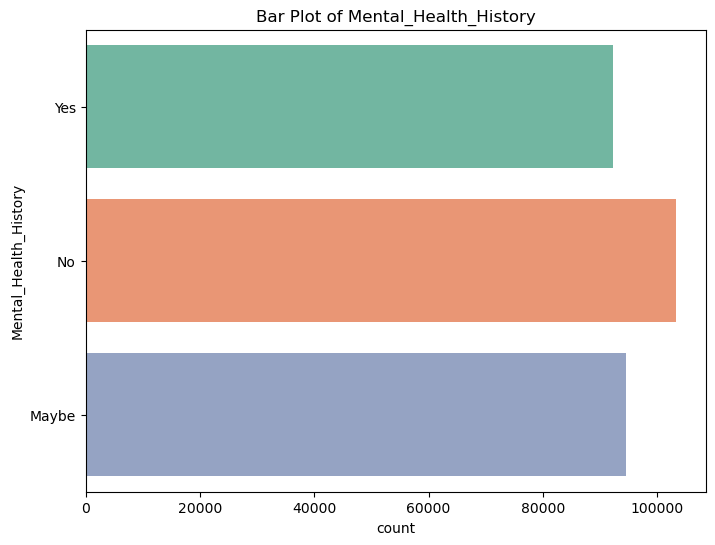

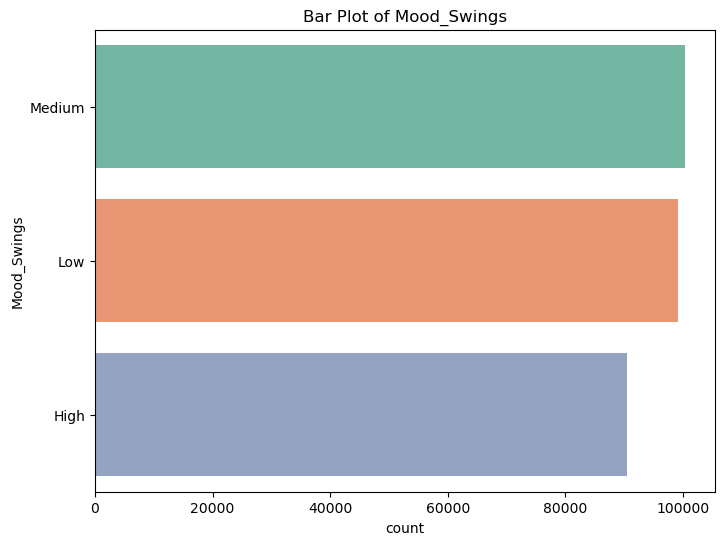

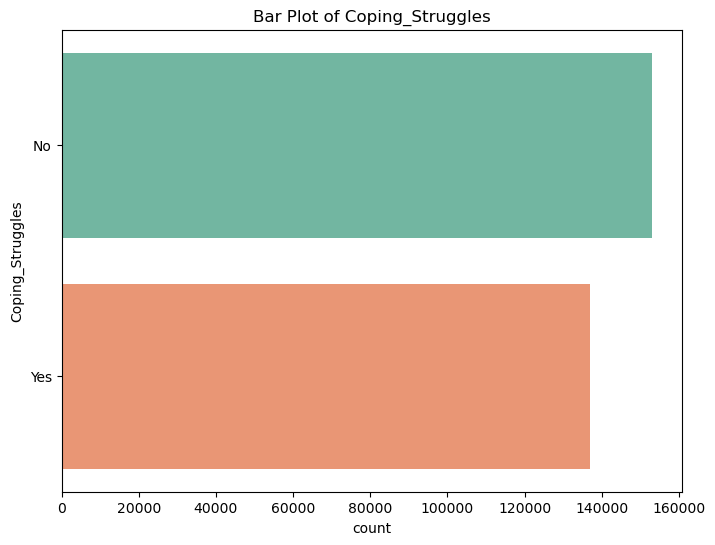

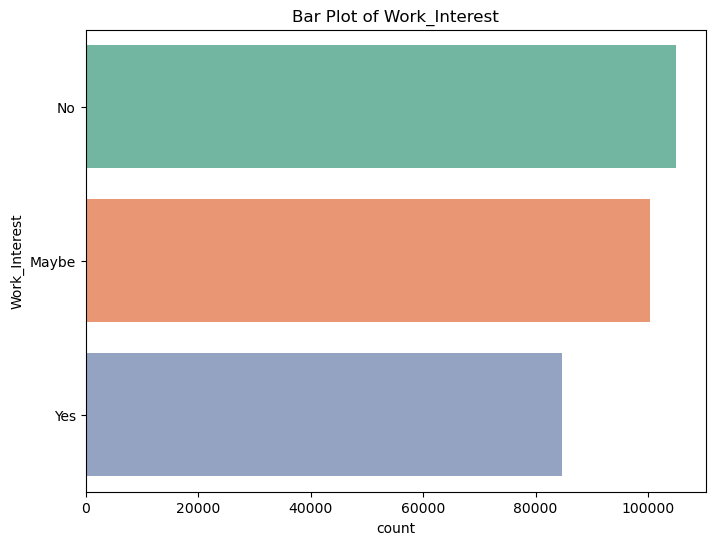

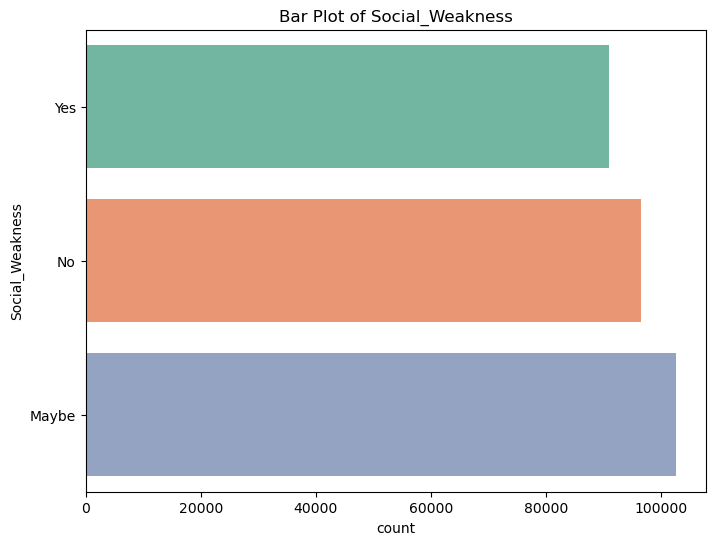

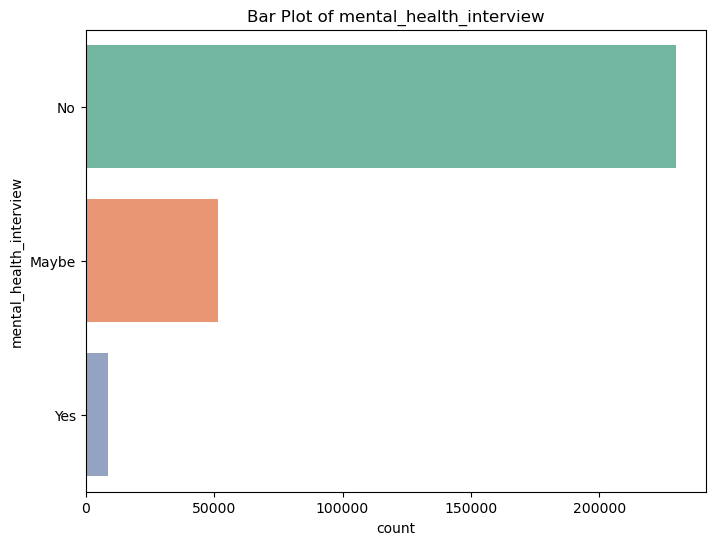

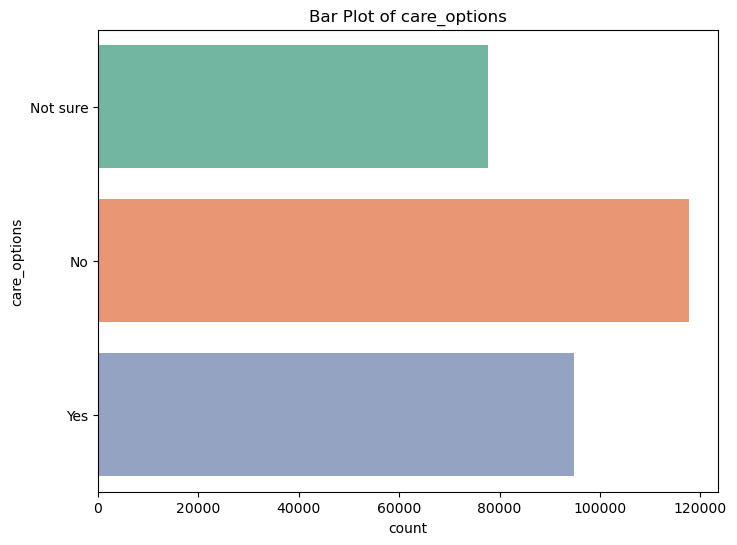

KeyboardInterrupt: 

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data Cleaning and Preprocessing ###

# Manejo de valores faltantes
df.fillna({'self_employed': df['self_employed'].mode()[0],
           'family_history': df['family_history'].mode()[0],
           'care_options': df['care_options'].mode()[0]}, inplace=True)

# Eliminación de duplicados
df.drop_duplicates(inplace=True)

# Limpieza básica de datos
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Formatear la columna de fecha

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)



In [ ]:
### Exploratory Data Analysis ###

#### Summary Statistics ####

# Estadísticas resumidas para variables numéricas
summary_stats_numeric = df_encoded.describe()

#### Visualization ####

# Gráficos de barras para variables categóricas
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(y=col, data=df, palette='Set2')
        plt.title(f'Bar Plot of {col}')
        plt.ylabel(col)
        plt.show()

# Relaciones entre variables
plt.figure(figsize=(12, 10))
sns.pairplot(df_encoded)
plt.title('Pairplot of Variables')
plt.show()


In [ ]:

# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Análisis de series temporales (si aplica)
# Si hay una columna de fecha en el DataFrame, se puede realizar un análisis de series temporales.

#### Additional Analyses ####

# Identificación de patrones adicionales
# Realización de ingeniería de características
# Pruebas de hipótesis
# Comparación de subconjuntos de datos

### Insights and Conclusion ###

# Encontramos que hay una alta prevalencia de síntomas de salud mental entre los empleados encuestados.
# Existe una correlación entre ciertos factores, como el estrés creciente y los cambios en los hábitos, y la predisposición a buscar tratamiento para la salud mental.
# Se necesita más investigación para comprender completamente las causas y efectos de estos patrones.

# GitHub Repository
# Crear un nuevo repositorio con el nombre adecuado y cargar el documento de análisis en el repositorio.
# Compartir la URL del repositorio a través de Slack.
